# GSW Analysis: Winning and Superstar Impact
by Richard Anciado

***
## Description
In this exercise, we look at the 2 month data of the Golden State Warriors' Facebook page. We investigate the impact Stephen Curry has on Social Media posts and examine how winning games affect user engagement.


## Data

We will use this [data](https://docs.google.com/spreadsheets/d/1f70_OUWyN9RLOn2PLmQlIDgyt0Mr94-Of-T5_jTyroI/edit#gid=170132650). It provides Page and Post key metrics for December 2013 - January 2014.

***
## Let's Dig In!

First, we import the necessary packages.

In [1]:
try:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline
except:
    import traceback
    traceback.print_exc()
    raise ImportError('Something failed, see above.')

## Prepare the Data
We load the data and use the same key metrics found [here](https://drive.google.com/file/d/0Byts4rXrKElFWkZkSmEwYzAyVkk/view).

Let's store the __Page Key Metrics__ sheet in a data frame and track the following:
1. __Lifetime Post Organic Reach__ - The number of people who saw your Page post in news feed or ticker, or on your Page's timeline. (Unique Users)
2. __Lifetime Engaged Users__ - The number of people who clicked anywhere in your posts. (Unique Users)
3. __Lifetime Post Consumptions__ - The number of clicks anywhere in your post. (Total Count)

In [2]:
excel_file = 'Warriors_FB_Sample_Data_20140124.xlsx'
metrics_page = pd.read_excel(excel_file, skiprows=[1], usecols=[0,2,3,6,8,13,15], sheet_name=0)
metrics_page = metrics_page[pd.notnull(metrics_page['Post Message'])]
metrics_page.head()

,Post ID,Post Message,Type,Posted,Lifetime Post organic reach,Lifetime Engaged Users,Lifetime Post Consumptions
0,47657117525_10152236476722526,IT’S GAME DAY! The #Warriors continue their 5-...,Photo,2014-01-24 09:59:41,90656,4912,2898
1,47657117525_10152093353167906,"Warriors TV Exclusive: Last night, Laurence Sc...",Video,2014-01-24 08:46:29,110784,3404,3049
2,47657117525_10152092224622906,After garnering over 1 million votes and learn...,Link,2014-01-23 17:55:01,358016,21056,17899
3,47657117525_10152235165297526,OFFICIAL: Stephen Curry has been named a start...,Photo,2014-01-23 16:27:59,615680,43984,46037
4,47657117525_10152234295762526,"Andre Iguodala, David Lee, Klay Thompson and S...",Photo,2014-01-23 09:22:43,275328,21752,24949


In [3]:
metrics_page.count()

Post ID                        193
Post Message                   193
Type                           193
Posted                         193
Lifetime Post organic reach    193
Lifetime Engaged Users         193
Lifetime Post Consumptions     193
dtype: int64


This sheet has __193 qualified (not null)__ data points.


Next, we store the contents of the __Post Key Metrics__ sheet and track the following:
1. __Daily New Likes__ - The number of new people who have liked your Page (Unique Users)
2. __Daily Unlikes__ - The number of Unlikes of your Page (Unique Users)
3. __Daily Page Engaged Users__ - The number of people who engaged with your Page. Engagement includes any click or story created. (Unique Users)


In [4]:
metrics_post = pd.read_excel(excel_file, skiprows=[1], usecols=[0,2,3,4], sheet_name=1)
metrics_post.head()

,Date,Daily New Likes,Daily Unlikes,Daily Page Engaged Users
0,2013-12-01,3269,130,21104
1,2013-12-02,3210,110,12353
2,2013-12-03,3357,156,39448
3,2013-12-04,3013,135,37245
4,2013-12-05,3245,129,18310


In [5]:
metrics_post.count()

Date                        55
Daily New Likes             55
Daily Unlikes               55
Daily Page Engaged Users    55
dtype: int64


This sheet has __55 qualified (not null)__ data points.



Now that we have our data, let's take a closer look at the information they provide us.

***
## Part 1: Stephen Curry and Social Media

In Part 1, We'll take a look at the impact Stephen Curry has on the Warriors' Social Media account. We'll investigate if posts about Curry perform better than the others.

### Step 1 - Setting the Baseline

Let's compute the __Lifetime Averages per Post__ for the __Page Metrics__. This gives us a baseline for how all posts  perform.

In [6]:
all_post_data = {}
all_post_data['Organic Reach'] = metrics_page.iloc[:,4].mean()
all_post_data['Engaged Users'] = metrics_page.iloc[:,5].mean()
all_post_data['Consumptions'] = metrics_page.iloc[:,6].mean()

print('1. Organic Reach : {0:,.2f} unique users per post'.format(all_post_data['Organic Reach']))
print('2. Engaged Users : {0:,.2f} unique users per post'.format(all_post_data['Engaged Users']))
print('3. Consumptions : {0:,.2f} clicks per post'.format(all_post_data['Consumptions']))

1. Organic Reach : 193,648.20 unique users per post
2. Engaged Users : 14,527.55 unique users per post
3. Consumptions : 17,147.09 clicks per post



### Step 2 - Extracting the Data
Now we isolate the __Post Messages__ that contain any mention of __Stephen Curry__. We exclude posts that mention other teammates (starting five).

In [7]:
curry_data = []
non_curry_data = []

for index, row in metrics_page.iterrows():
    curry = ['steph', 'stephen', 'curry']
    post_message = row['Post Message'].lower()
    
    if any(c in post_message for c in curry):
        team = ['andre', 'iguodala', 'klay', 'thompson', 'andrew', 'bogut', 'david', 'lee']
        
        if any(c in post_message for c in team):
            non_curry_data.append(row)
            continue
        
        curry_data.append(row)
        continue
    
    non_curry_data.append(row)

metrics_curry = pd.DataFrame(curry_data)
metrics_curry.head()

,Post ID,Post Message,Type,Posted,Lifetime Post organic reach,Lifetime Engaged Users,Lifetime Post Consumptions
1,47657117525_10152093353167906,"Warriors TV Exclusive: Last night, Laurence Sc...",Video,2014-01-24 08:46:29,110784,3404,3049
2,47657117525_10152092224622906,After garnering over 1 million votes and learn...,Link,2014-01-23 17:55:01,358016,21056,17899
3,47657117525_10152235165297526,OFFICIAL: Stephen Curry has been named a start...,Photo,2014-01-23 16:27:59,615680,43984,46037
10,47657117525_10152228707397526,Today is the last day to Dub The Vote. #NBAAll...,Photo,2014-01-20 14:15:44,336000,20744,28193
12,47657117525_10152226346602526,If you want to see Stephen Curry in the NBA Al...,Photo,2014-01-19 13:06:07,336768,20264,25779



Let's take a look at how many posts are included.


In [8]:
metrics_curry.count()

Post ID                        45
Post Message                   45
Type                           45
Posted                         45
Lifetime Post organic reach    45
Lifetime Engaged Users         45
Lifetime Post Consumptions     45
dtype: int64

That's __45__ out of __193__ qualified data points. Roughly __23%__ of all posts.


### Step 3 - Computing the Changes
After extracting the relevant data, let's compute the __Lifetime Averages per Post__ for __Curry__.

In [9]:
curry_post_data = {}
curry_post_data['Organic Reach'] = metrics_curry.iloc[:,4].mean()
curry_post_data['Engaged Users'] = metrics_curry.iloc[:,5].mean()
curry_post_data['Consumptions'] = metrics_curry.iloc[:,6].mean()

print('1. Organic Reach : {0:,.2f} unique users per post'.format(curry_post_data['Organic Reach']))
print('2. Engaged Users : {0:,.2f} unique users per post'.format(curry_post_data['Engaged Users']))
print('3. Consumptions : {0:,.2f} clicks per post'.format(curry_post_data['Consumptions']))

1. Organic Reach : 254,553.60 unique users per post
2. Engaged Users : 18,090.87 unique users per post
3. Consumptions : 22,071.53 clicks per post



A quick glance shows that all numbers went up, but how much better is it?



### Step 4 - Comparing the Data
Let's compare the data for __All Posts__ and __Curry Posts__ using the following metrics.

### Organic Reach

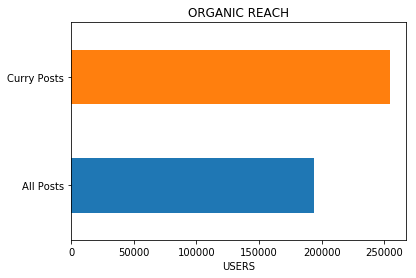

In [10]:
combined_post_data = [all_post_data, curry_post_data]
combined_df = pd.DataFrame(combined_post_data, index = ['All Posts', 'Curry Posts'])

combined_df['Organic Reach'].transpose().plot.barh(title='ORGANIC REACH')

plt.xlabel('USERS')
plt.show()


There is a __31.45% increase__ in __Lifetime Organic Reach per Post__.


### Engaged Users

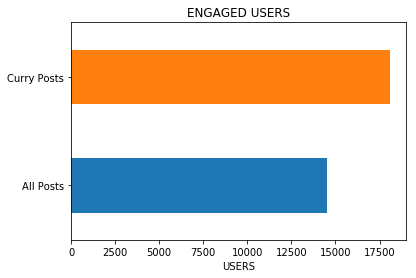

In [11]:
combined_df['Engaged Users'].transpose().plot.barh(title='ENGAGED USERS')

plt.xlabel('USERS')
plt.show()

There is a __24.53% increase__ in __Lifetime Engaged Users per Post__. 

### Consumptions

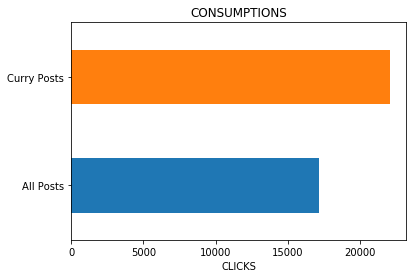

In [12]:
combined_df['Consumptions'].transpose().plot.barh(title='CONSUMPTIONS')

plt.xlabel('CLICKS')
plt.show()

There is a __28.72% increase__ in __Lifetime Consumptions per Post__.

Clearly, posts about Curry have significant impact on engagement and reach. This becomes even more evident when we compare __Curry Posts__ with __Non-Curry Posts__.


### Step 5 - The Rest of the Field

Let's take a closer look at __Non-Curry Posts__. These are posts that either didn't mention Curry or mentioned him along with other players (possible pre-game line up announcements).

In [13]:
metrics_non_curry = pd.DataFrame(non_curry_data)
metrics_non_curry.count()

Post ID                        148
Post Message                   148
Type                           148
Posted                         148
Lifetime Post organic reach    148
Lifetime Engaged Users         148
Lifetime Post Consumptions     148
dtype: int64

That's __148__ out of __193__ qualified posts. Roughly __77%__ of all data.

Next, we compute the the __Lifetime Averages per Post__ for __Non-Curry Posts__.

In [14]:
non_curry_post_data = {}
non_curry_post_data['Organic Reach'] = metrics_non_curry.iloc[:,4].mean()
non_curry_post_data['Engaged Users'] = metrics_non_curry.iloc[:,5].mean()
non_curry_post_data['Consumptions'] = metrics_non_curry.iloc[:,6].mean()

print('1. Organic Reach : {0:,.2f} unique users per post'.format(non_curry_post_data['Organic Reach']))
print('2. Engaged Users : {0:,.2f} unique users per post'.format(non_curry_post_data['Engaged Users']))
print('3. Consumptions : {0:,.2f} clicks per post'.format(non_curry_post_data['Consumptions']))

1. Organic Reach : 175,129.66 unique users per post
2. Engaged Users : 13,444.11 unique users per post
3. Consumptions : 15,649.80 clicks per post


A quick look shows us that all numbers are lower than the average for __All Posts__. Next, we'll compare this data with __Curry Posts__ to get a better understanding of the impact Curry has on Social Media.

### Step 6 - Getting a Better Picture

Just like in __Step 4__, we'll compare the data in 3 different metrics.

### Organic Reach

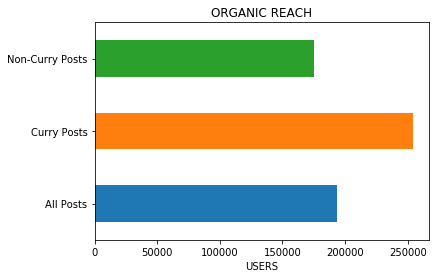

In [15]:
combined_post_data = [all_post_data, curry_post_data, non_curry_post_data]
combined_df = pd.DataFrame(combined_post_data, index = ['All Posts', 'Curry Posts', 'Non-Curry Posts'])

combined_df['Organic Reach'].transpose().plot.barh(title='ORGANIC REACH')

plt.xlabel('USERS')
plt.show()

There is a __45.35% increase__ in __Lifetime Organic Reach per Post__ between __Non-Curry__ and __Curry Posts__.

### Engaged Users

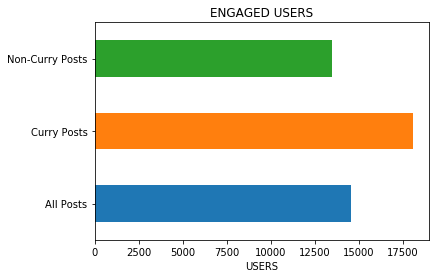

In [16]:
combined_df['Engaged Users'].transpose().plot.barh(title='ENGAGED USERS')

plt.xlabel('USERS')
plt.show()

There is a __34.56% increase__ in __Lifetime Engaged Users per Post__ between __Non-Curry__ and __Curry Posts__.

### Consumptions

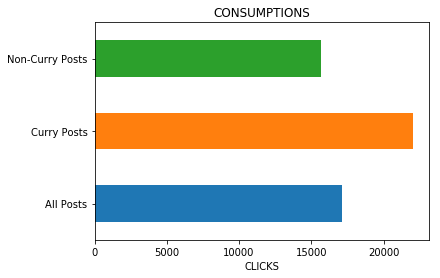

In [17]:
combined_df['Consumptions'].transpose().plot.barh(title='CONSUMPTIONS')

plt.xlabel('CLICKS')
plt.show()

There is a __41.03% increase__ in __Lifetime Consumptions per Post__ between __Non-Curry__ and __Curry Posts__.

### Step 7 - Conclusion

The NBA is a star-driven league. Superstars sell tickets and drive ratings. They sell merchandise and attract attention. 

The same applies online. Superstars increase engagement and reach. People want to watch, discuss, and support their  favorite players. This is especially true for Stephen Curry.

In the 2013-2014 NBA Season, Curry became the first Warrior in [19 years](https://www.nba.com/warriors/1314-review-curry) to start in the All-Star Game. He also finished [4th](https://en.wikipedia.org/wiki/2014_NBA_All-Star_Game) in voting with over 1 Million votes.

It only seems right the data back this up. Fans want to see more of Curry. They want to talk about him and know more about him. Featuring Curry in more social media posts is definitely a good idea. 

### Step 8 - Notes

This data covers the period of January where there has been a higher than normal amount of [engagement](https://drive.google.com/file/d/0Byts4rXrKElFNkw5aUVEVHpTQW8/view). This may be due to the NBA All-Star voting process. Fans are able to vote for their favourite players by commenting #NBABallot on Facebook. A better approach would be to study the impact of Curry over a period of 1 year.

***
## Part 2: Winning and User Engagement

In Part 2, we'll look at how winning games affect social media engagement. We'll investigate if the Warrior's Facebook Page performs better when they win games.


### Step 1 - Game Data and Parameters
We'll extract the game data [here](http://www.landofbasketball.com/results_by_team/2013_2014_warriors.htm) and use the following parameters:

1. Investigate the Facebook Page performance 24 hours after every win. We use 24 hours because most games are played in the evening and related content are published after games. We want to see if users are more likely to engage with content when the team wins.


2. Cover games played from November 30 2013 - January 23, 2014.

In [18]:
game_file = 'Warriors_Games_Dec_Jan.xlsx'
game_df = pd.read_excel(game_file, sheet_name=0)
game_df = game_df[game_df['Result'] == 'W']
game_df = game_df[['Date','Result']]

# Add 24 hours to the winning date
for i, row in game_df.iterrows():
    game_df.at[i,'Date'] = row['Date'] + pd.to_timedelta('1 day')

game_df.head()

,Date,Result
0,2013-12-02,W
1,2013-12-04,W
3,2013-12-08,W
5,2013-12-12,W
8,2013-12-18,W


In [19]:
game_df.count()

Date      17
Result    17
dtype: int64

There are __17 dates__ (24hrs after winning games) during this period.



### Step 2 - Setting the Baseline
Let's compute the __Daily Averages__ for the Post Metrics. This gives us a baseline for how users engaged with the Facebook Page.

In [20]:
daily_data = {}
daily_data['Daily Net Likes'] = metrics_post.iloc[:,1].mean() - metrics_post.iloc[:,2].mean()
daily_data['Daily Engaged Users'] = metrics_post.iloc[:,3].mean()

print('1. Net Likes (Likes - Unlikes) : {0:,.2f} unique users per day'.format(daily_data['Daily Net Likes']))
print('2. Engaged Users : {0:,.2f} unique users per day'.format(daily_data['Daily Engaged Users']))

1. Net Likes (Likes - Unlikes) : 6,474.36 unique users per day
2. Engaged Users : 64,924.49 unique users per day



### Step 3 - Extracting Data
Now we get the data for dates listed in Step 1.

In [30]:
metrics_win = pd.merge(df, df2, on='Date')
metrics_win.head()

,Date,Daily New Likes,Daily Unlikes,Daily Page Engaged Users,Result
0,2013-12-02,3210,110,12353,W
1,2013-12-04,3013,135,37245,W
2,2013-12-08,4002,175,49793,W
3,2013-12-12,4609,213,108307,W
4,2013-12-18,4972,201,48939,W



### Step 4 - Computing the Changes
We compute the __Daily Averages__ for the new data (24hrs after wins).

In [31]:
win_data = {}
win_data['Daily Net Likes'] = metrics_win.iloc[:,1].mean() - metrics_win.iloc[:,2].mean()
win_data['Daily Engaged Users'] = metrics_win.iloc[:,3].mean()

print('1. Net Likes (Likes - Unlikes) : {0:,.2f} unique users per day'.format(win_data['Daily Net Likes']))
print('2. Engaged Users : {0:,.2f} unique users per day'.format(win_data['Daily Engaged Users']))

1. Net Likes (Likes - Unlikes) : 6,800.65 unique users per day
2. Engaged Users : 72,817.35 unique users per day


A quick look shows that there is an increase in average __Net Likes__ and __Engaged Users__ after every win.


### Step 5 - Comparing Data
Let's take a closer look at the difference.

### Daily Net Likes

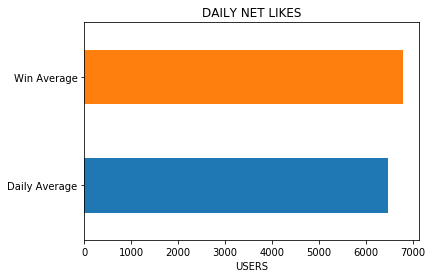

In [33]:
combined_average_data = [daily_data, win_data]
combined_ave_df = pd.DataFrame(combined_average_data, index = ['Daily Average', 'Win Average'])

combined_ave_df['Daily Net Likes'].transpose().plot.barh(title='DAILY NET LIKES')

plt.xlabel('USERS')
plt.show()

There is a __5.04% increase__ in __Daily Net Likes__ whenever the team wins.

### Daily Engaged Users

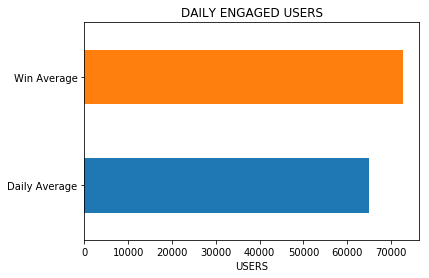

In [34]:
combined_ave_df['Daily Engaged Users'].transpose().plot.barh(title='DAILY ENGAGED USERS')

plt.xlabel('USERS')
plt.show()

There is a __12.16% increase__ in __Daily Engaged Users__ after every win.


### Step 6 - Conclusion

While it is not as significant as Curry's impact on user engagement, there is still a slight improvement after every win.

It makes sense given how fans are more likely to celebrate (share, like, comment) a win compared to a loss. It is worth testing if increasing the number of posts after every win improves the overall marketing effort.

***
## Final Thoughts

Fans love their star players. They also love winning. They love it even more when their star players excel in a win.

It is worth investigating how much user engagement will improve if we continue to showcase star players. For example, we can feature Curry on __more than 30%__ (currently at 23%) of the posts. Even when he doesn't play well, we can pick his highlights and share it to the fans.

The fans want it. The data seems to support it.